In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import pandas as pd
import math
import random

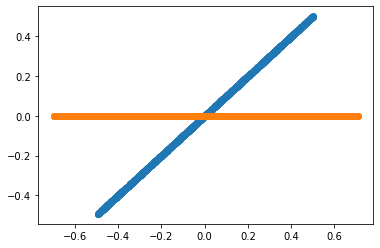

In [7]:
# consider a pair of random variables x, y. Consider the base case when y = n * x. The x and y variables will be perfectly correlated since y is a scaled x
n = 1
x = np.random.uniform(1,2,1000)
y = x.copy() * n

# center the data
x = x - np.mean(x)
y = y - np.mean(y)

data = pd.DataFrame({'x': x, 'y': y})
plt.scatter(data.x, data.y)

pca = PCA(n_components=2)

# create the transformation model for this data. Internally, it gets the rotation matrix and the explained variance
pcaTr = pca.fit(data)

rotatedData = pcaTr.transform(data)
dataPCA = pd.DataFrame(data=rotatedData, columns = ['PC1', 'PC2'])

plt.scatter(dataPCA.PC1, dataPCA.PC2)
plt.show()

In [9]:
# pcaTr.components_ has the rotation matrix
# pcaTr.explained_variance_ has the explained variance of each principal component
print(pcaTr.components_)
print(pcaTr.explained_variance_)

[[ 0.70710678  0.70710678]
 [ 0.70710678 -0.70710678]]
[1.62925323e-01 1.39961096e-32]


angle:  45.0
rotationMatrix
[[ 0.70710678  0.70710678]
 [-0.70710678  0.70710678]]


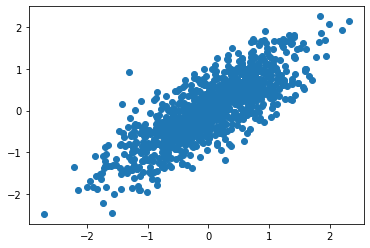

In [11]:
# Correlated normal random variables
import matplotlib.lines as mlines
import matplotlib.transforms as mtransforms

random.seed(100)

std1 = 1
std2 = 0.333

x = np.random.normal(0, std1, 1000)
y = np.random.normal(0, std2, 1000)

x = x - np.mean(x)
y = y - np.mean(y)

# Define a pair of dependent variables with a desired amount of covariance
n = 1
angle = np.arctan(1/n) # covariance to angle
print('angle: ', angle * 180 / math.pi)

# Create a rotation matrix using the given angle
rotationMatrix = np.array([[np.cos(angle), np.sin(angle)], [-np.sin(angle), np.cos(angle)]])

print('rotationMatrix')
print(rotationMatrix)

xy = np.concatenate(([x] , [y]), axis=0).T

data = np.dot(xy, rotationMatrix) # transform the data with the rotation matrix to correlate the two variables

plt.scatter(data[:,0], data[:,1])
plt.show()

[[-0.70464686 -0.70955817]
 [-0.70955817  0.70464686]]
[1.07802808 0.11748222]


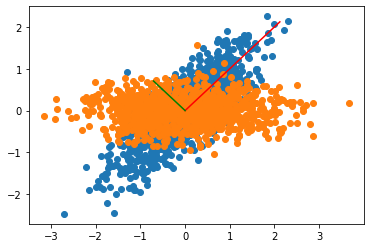

In [15]:
# print the original and resulting transformed system using the result of the PCA in the same plot alongside 2 principal component vectors in red and blue
plt.scatter(data[:,0], data[:,1])


pca = PCA(n_components=2)
pcaTr = pca.fit(data)
dataPCA = pcaTr.transform(data)

print(pcaTr.components_)
print(pcaTr.explained_variance_)

plt.scatter(dataPCA[:,0], dataPCA[:,1])
plt.plot([0, rotationMatrix[0][0] * std1 * 3], [0,rotationMatrix[0][1] * std1 * 3], 'k-', color='red')
plt.plot([0, rotationMatrix[1][0] * std2 * 3], [0,rotationMatrix[1][1] * std2 * 3], 'k-', color='green')

plt.show()

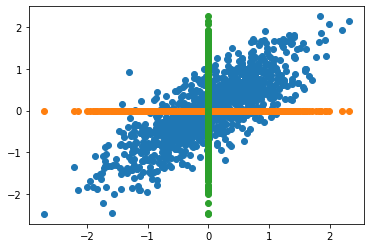

In [19]:
# PCA for dimensionality reduction
nPoints = len(data)

plt.scatter(data[:,0], data[:,1])
plt.scatter(data[:,0], np.zeros(nPoints))
plt.scatter(np.zeros(nPoints), data[:,1])
plt.show()
